# 1.0 Full Exploratory Data Analysis

## Libraries

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:

import kalebsampaco.utils.paths as Path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Download data

### Specify input and output files

In [6]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = Path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [7]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 78 1673k   78 1321k    0     0   647k      0  0:00:02  0:00:02 --:--:--  647k
100 1673k  100 1673k    0     0   776k      0  0:00:02  0:00:02 --:--:--  776k


## Process data

### Read data

In [8]:
input_covid_file = Path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [9]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1091 entries, Province/State to 1/12/23
dtypes: float64(2), int64(1087), object(2)
memory usage: 2.4+ MB


In [10]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207654,207715,207748,207766,207766,207819,207841,207866,207900,207900
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333812,333818,333850,333887,333916,333947,333948,333995,333995,334018
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271230,271236,271244,271250,271254,271254,271255,271262,271268,271277
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47751,47751,47781,47781,47781,47781,47781,47781,47781,47781
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


### Process data

In [11]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [12]:
output_covid_file = Path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [13]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [14]:
processed_covid_file = Path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [15]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314143 entries, 0 to 314142
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  314143 non-null  object
 1   date            314143 non-null  object
 2   value           314143 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [16]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [17]:
sns.set_style("whitegrid")

In [18]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [19]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [20]:
import kalebsampaco.visualization.visualize as visualize

Plot time series.

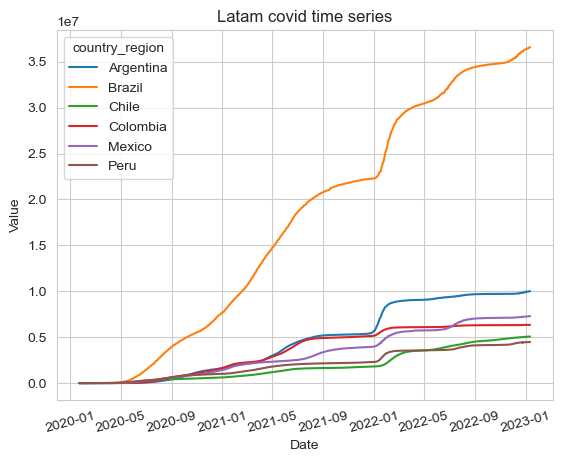

In [21]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [29]:
visualize.top_countries(processed_covid_df, countries, 5)

,country_region,value,color
0,US,48063195967,lightblue
1,India,26628733890,lightblue
2,Brazil,19116747009,red
3,France,13879473331,lightblue
4,Germany,11563140296,lightblue


Plot to Latam in highlighted bars.

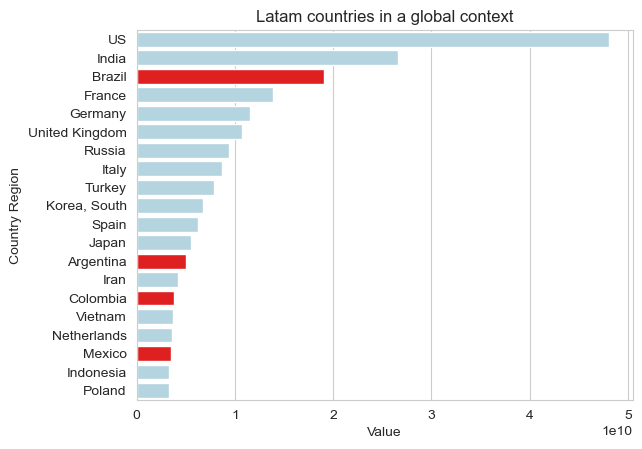

In [30]:
visualize.visualize_top_countries(top_countries_df)
